In [1]:
import pandas as pd

In [2]:
train_data=pd.read_csv("train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("test.csv",header=0,names=['classid','title','desc'])

3    30000
4    30000
2    30000
1    30000
Name: classid, dtype: int64


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


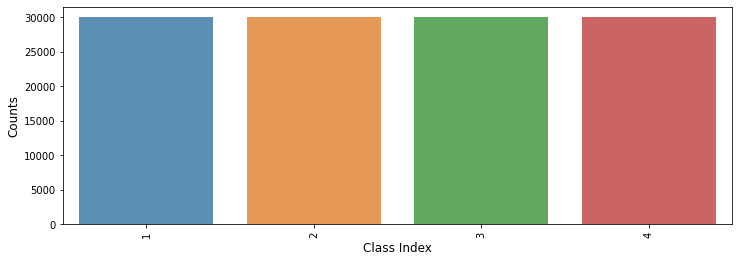

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

train_class = train_data['classid'].value_counts()
print(train_class)

plt.figure(figsize=(12,4))
sns.barplot(train_class.index, train_class.values, alpha=0.8)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Class Index', fontsize=12)
plt.xticks(rotation=90)
plt.show()

3    1900
4    1900
2    1900
1    1900
Name: classid, dtype: int64


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


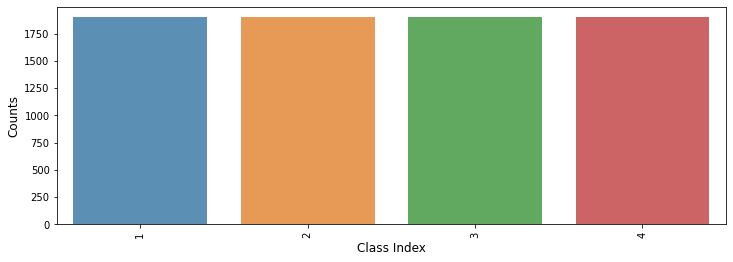

In [4]:
test_class = test_data['classid'].value_counts()
print(test_class)

plt.figure(figsize=(12,4))
sns.barplot(test_class.index, test_class.values, alpha=0.8)
plt.ylabel('Counts', fontsize=12)
plt.xlabel('Class Index', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [5]:
test_categories = []
test_text = []

train_categories = []
train_text = []

In [6]:
for index, row in train_data.iterrows():
    train_categories.append(row['classid'])
    text = row['title'] + ' ' + row['desc']
    train_text.append(text)
    
for index, row in test_data.iterrows():
    test_categories.append(row['classid'])
    text = row['title'] + ' ' + row['desc']
    test_text.append(text)

In [7]:
trainDF = pd.DataFrame({'categories':train_categories, 'text':train_text})
testDF = pd.DataFrame({'categories':test_categories, 'text':test_text})

In [8]:
trainDF['categories'].value_counts()

3    30000
4    30000
2    30000
1    30000
Name: categories, dtype: int64

In [9]:
testDF['categories'].value_counts()

3    1900
4    1900
2    1900
1    1900
Name: categories, dtype: int64

In [10]:
trainDF.head(5)

,categories,text
0,3,Wall St. Bears Claw Back Into the Black (Reute...
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,3,"Oil prices soar to all-time record, posing new..."


In [11]:
testDF.head(5)

,categories,text
0,3,Fears for T N pension after talks Unions repre...
1,4,The Race is On: Second Private Team Sets Launc...
2,4,Ky. Company Wins Grant to Study Peptides (AP) ...
3,4,Prediction Unit Helps Forecast Wildfires (AP) ...
4,4,Calif. Aims to Limit Farm-Related Smog (AP) AP...


In [21]:
newtrainDF = trainDF.groupby('categories')['text'].apply(lambda s: s.sample(1000)).to_frame()

newtrainDF.reset_index(inplace=True)

newtrainDF = newtrainDF[['categories', 'text']]

In [22]:
newtrainDF.head()

,categories,text
0,1,"Iran Says Its Missiles Can Now Reach 1,250 Mil..."
1,1,Italian women kidnapped in raid on relief agen...
2,1,Insurgent Alliance Is Fraying in Fallujah Re...
3,1,Rahul the #39;darling #39; at AICC conclave N...
4,1,Judges Postpone Milosevic Trial for Month (AP)...


In [23]:
newtrainDF['categories'].value_counts()

1    1000
2    1000
3    1000
4    1000
Name: categories, dtype: int64

In [24]:
newtestDF = testDF.groupby('categories')['text'].apply(lambda s: s.sample(400)).to_frame()

newtestDF.reset_index(inplace=True)

newtestDF = newtestDF[['categories', 'text']]

In [25]:
newtestDF.head()

,categories,text
0,1,"Strong Quake Injures Six in Colombia BOGOTA, ..."
1,1,"Ispat, LNM, ISG merge to form world's largest ..."
2,1,Ailing Arafat Arrives in Paris for Medical Tre...
3,1,"Frail Pope Celebrates Mass at Lourdes LOURDES,..."
4,1,Bambang unveils plans for his first 100 days J...


In [26]:
newtestDF['categories'].value_counts()

1    400
2    400
3    400
4    400
Name: categories, dtype: int64

In [27]:
newtrainDF.to_csv('./agNews_train.csv')
newtestDF.to_csv('./agNews_test.csv')